# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q=London"
response = requests.get(query_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1738362320,
 'id': 2643743,
 'main': {'feels_like': 277.3,
          'grnd_level': 1024,
          'humidity': 91,
          'pressure': 1029,
          'sea_level': 1029,
          'temp': 279.25,
          'temp_max': 280.21,
          'temp_min': 278.72},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1738309216,
         'sunset': 1738342051,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 2.57}}


In [14]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | nemuro
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | launceston
Processing Record 8 of Set 1 | misratah
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | kaifeng
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | kataba
Processing Record 13 of Set 1 | kirov
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | chonchi
Processing Record 19 of Set 1 | antsiranana
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bikenibeu village
Processing Record 22 of Set 1 | yellowknife
Proc

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,18.07,85,12,2.01,AU,1738416541
1,adrar,20.5022,-10.0711,22.18,13,0,8.18,MR,1738416543
2,nemuro,43.3236,145.5750,-3.26,75,92,5.64,JP,1738416544
3,bilibino,68.0546,166.4372,-34.51,96,100,0.81,RU,1738416545
4,waitangi,-43.9535,-176.5597,16.01,94,100,1.79,NZ,1738416546


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,18.07,85,12,2.01,AU,1738416541
1,adrar,20.5022,-10.0711,22.18,13,0,8.18,MR,1738416543
2,nemuro,43.3236,145.5750,-3.26,75,92,5.64,JP,1738416544
3,bilibino,68.0546,166.4372,-34.51,96,100,0.81,RU,1738416545
4,waitangi,-43.9535,-176.5597,16.01,94,100,1.79,NZ,1738416546


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

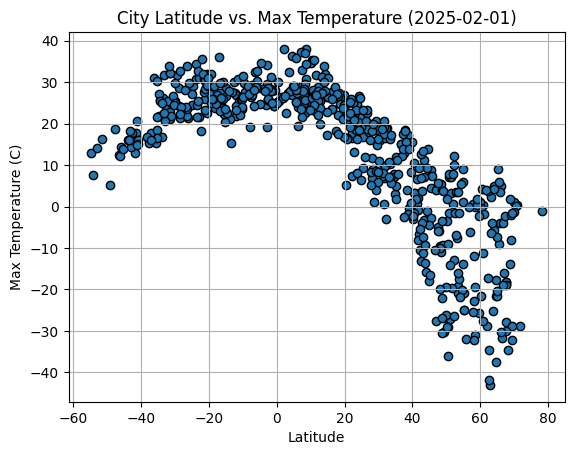

In [29]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2025-02-01)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

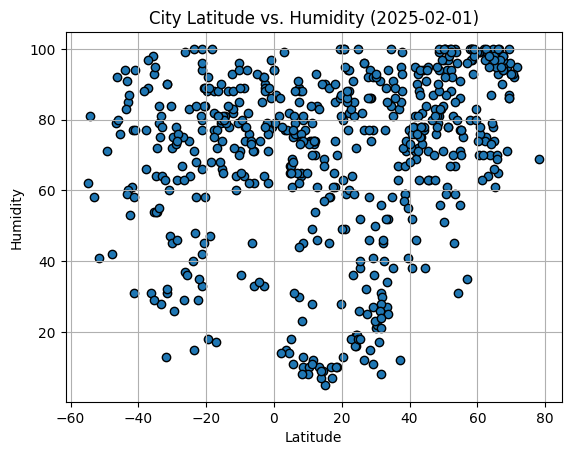

In [30]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
plt.xlabel('Latitude') 
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (2025-02-01)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

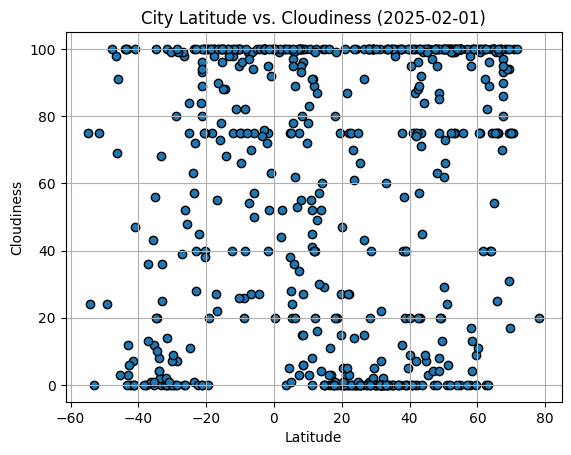

In [31]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (2025-02-01)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

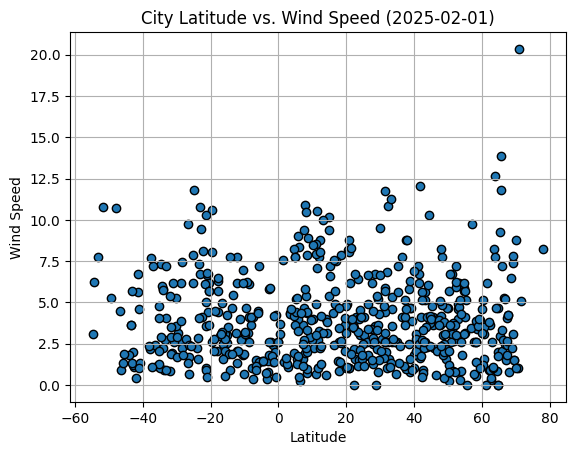

In [32]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,marker="o", edgecolors="black") 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (2025-02-01)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots

def linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title):
    """This function calculates the linear regression, generates plots and displays the R squared value"""
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 

    plt.scatter(x_values,y_values) 
    plt.title(f'{sc_title}')
    plt.xlabel(f'{sc_xlabel}')
    plt.ylabel(f'{sc_ylabel}')
    
    # Plot regression line 
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq,(6,10),fontsize=15,color="red") 
    # Print r square value 
    print(f"R squared: {rvalue**2}") 


In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adrar,20.5022,-10.0711,22.18,13,0,8.18,MR,1738416543
2,nemuro,43.3236,145.5750,-3.26,75,92,5.64,JP,1738416544
3,bilibino,68.0546,166.4372,-34.51,96,100,0.81,RU,1738416545
7,misratah,32.3754,15.0925,18.97,40,0,10.85,LY,1738416550
8,kaifeng,34.7911,114.3483,3.04,58,100,0.66,CN,1738416552


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,18.07,85,12,2.01,AU,1738416541
4,waitangi,-43.9535,-176.5597,16.01,94,100,1.79,NZ,1738416546
5,grytviken,-54.2811,-36.5092,7.54,81,24,6.21,GS,1738416547
6,launceston,-41.4500,147.1667,17.80,77,7,6.69,AU,1738416549
9,afaahiti,-17.7500,-149.2833,26.22,77,100,6.29,PF,1738416553


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7031999915494781


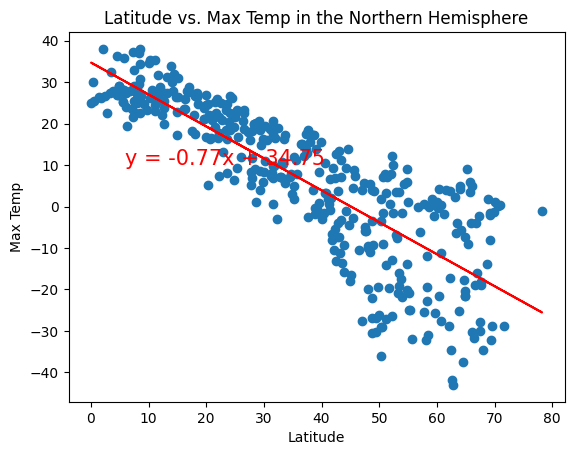

In [58]:
# Linear regression on Northern Hemisphere
Nx_values = northern_hemi_df["Lat"]
Ny_values = northern_hemi_df["Max Temp"]
Nsc_xlabel = "Latitude"
Nsc_ylabel = "Max Temp"
Nsc_title = "Latitude vs. Max Temp in the Northern Hemisphere"

linear_regression(Nx_values, Ny_values, Nsc_xlabel, Nsc_ylabel, Nsc_title)

R squared: 0.34411025810866236


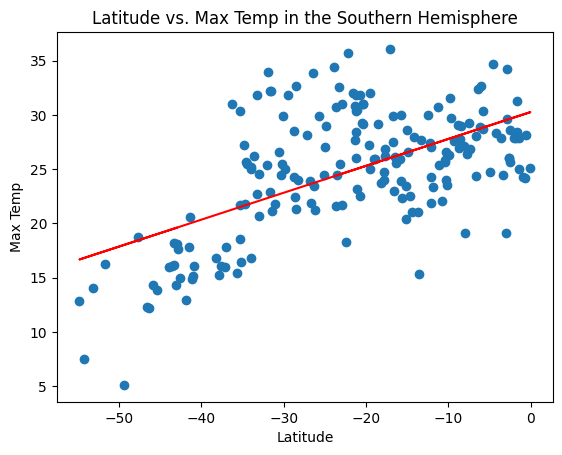

In [60]:
# Linear regression on Southern Hemisphere
Sx_values = southern_hemi_df["Lat"]
Sy_values = southern_hemi_df["Max Temp"]
Ssc_xlabel = "Latitude"
Ssc_ylabel = "Max Temp"
Ssc_title = "Latitude vs. Max Temp in the Southern Hemisphere"

linear_regression(Sx_values, Sy_values, Ssc_xlabel, Ssc_ylabel, Ssc_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.16391046662092273


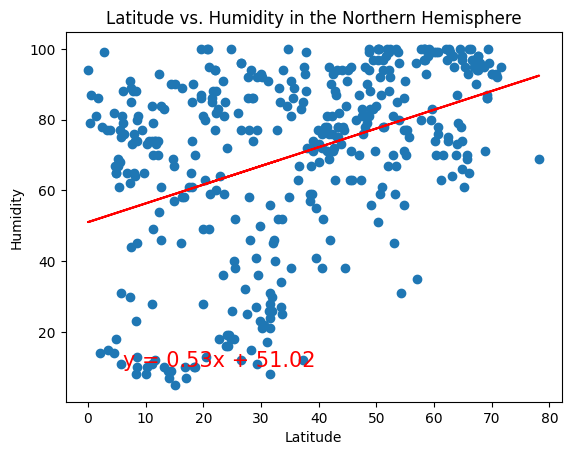

In [51]:
# Northern Hemisphere
Nx_values = northern_hemi_df["Lat"]
Ny_values = northern_hemi_df["Humidity"]
Nsc_xlabel = "Latitude"
Nsc_ylabel = "Humidity"
Nsc_title = "Latitude vs. Humidity in the Northern Hemisphere"

linear_regression(Nx_values, Ny_values, Nsc_xlabel, Nsc_ylabel, Nsc_title)

R squared: 0.026421892402937602


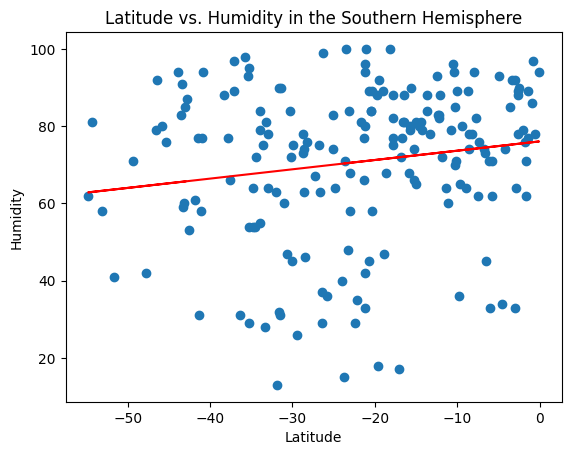

In [52]:
# Southern Hemisphere
Sx_values = southern_hemi_df["Lat"]
Sy_values = southern_hemi_df["Humidity"]
Ssc_xlabel = "Latitude"
Ssc_ylabel = "Humidity"
Ssc_title = "Latitude vs. Humidity in the Southern Hemisphere"

linear_regression(Sx_values, Sy_values, Ssc_xlabel, Ssc_ylabel, Ssc_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.059604519497506246


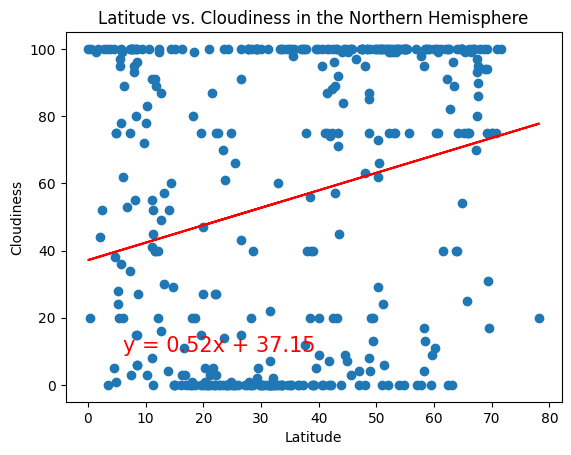

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
sc_xlabel = "Latitude"
sc_ylabel = "Cloudiness"
sc_title = "Latitude vs. Cloudiness in the Northern Hemisphere"

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title)

R squared: 0.2337938937427964


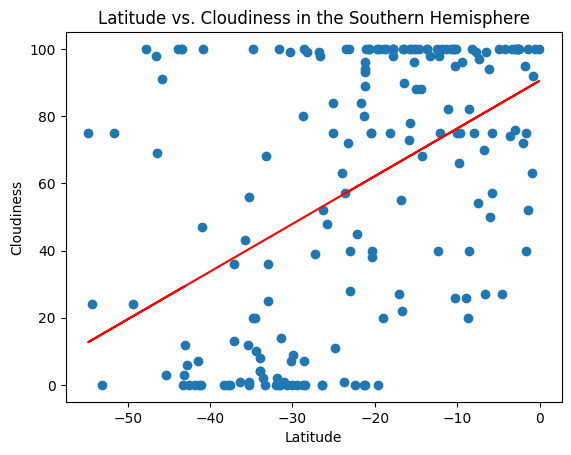

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
sc_xlabel = "Latitude"
sc_ylabel = "Cloudiness"
sc_title = "Latitude vs. Cloudiness in the Southern Hemisphere"

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.001699568401922113


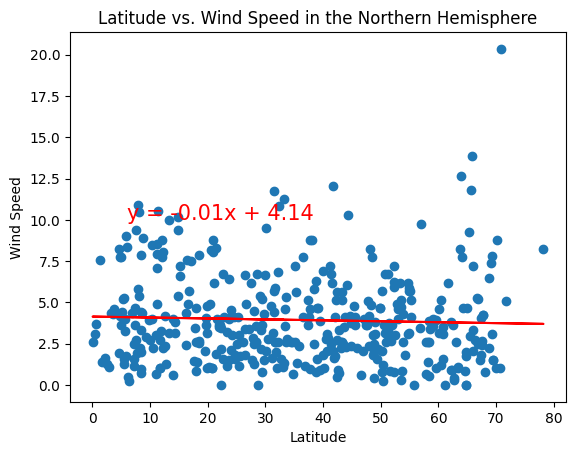

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
sc_xlabel = "Latitude"
sc_ylabel = "Wind Speed"
sc_title = "Latitude vs. Wind Speed in the Northern Hemisphere"

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title)

R squared: 0.023571441037577554


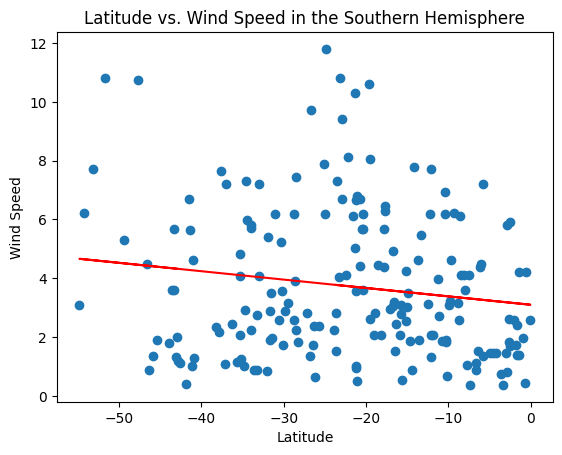

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
sc_xlabel = "Latitude"
sc_ylabel = "Wind Speed"
sc_title = "Latitude vs. Wind Speed in the Southern Hemisphere"

linear_regression(x_values, y_values,sc_xlabel,sc_ylabel,sc_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE